In [ ]:
!pip install medpy==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 13.3 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214947 sha256=ca84c619cf0ad6527353098f974e47ac1de31e4b36fc37b1211354984a14051c
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


In [ ]:
!pip install scikit-image

In [ ]:
!pip install PyWavelets==1.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.5 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.0
    Uninstalling scikit-image-0.25.0:
      Successfully uninstalled scikit-image-0.25.0


In [ ]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import util
from skimage import img_as_float
img_gray = img_as_float(img_gray)
from skimage.restoration import denoise_nl_means, estimate_sigma
import matplotlib.pylab as plt
from medpy.filter.smoothing import anisotropic_diffusion
from skimage.filters import gaussian, threshold_otsu
import skimage
print(skimage.__version__)

0.25.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def normalize(img):
 return (img-np.min(img))/(np.max(img)-np.min(img))

In [ ]:
def sketch(img, edges):
 output = np.multiply(img, edges)
 output[output>1]=1
 output[edges==1]=1
 return output


In [ ]:
def edges_with_anisotropic_diffusion(img, niter=100, kappa=10, gamma=0.1):
    img = img_as_float(img)
    sigma_est = np.mean(estimate_sigma(img))  # Hapus multichannel=False atau update scikit-image
    output = denoise_nl_means(img, h=0.8 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=6)  # Hapus multichannel=False
    output = img - output
    output[output > 0] = 1
    output[output < 0] = 0
    return output

In [ ]:
def sketch_with_dodge(img):
 orig = img
 blur = gaussian(util.invert(img), sigma=20)
 result = blur / util.invert(orig)
 result[result>1] = 1
 result[orig==1] = 1
 return result
def edges_with_dodge2(img):
 img_blurred = gaussian(util.invert(img), sigma=5)
 output = np.divide(img, util.invert(img_blurred) + 0.001)
 output = normalize(output)
 thresh = threshold_otsu(output)
 output = output > thresh
 return output

In [ ]:
def edges_with_DOG(img, k = 200, gamma = 1):
 sigma = 0.5
 output = gaussian(img, sigma=sigma) - gamma*gaussian(img, \
 sigma=k*sigma)
 output[output > 0] = 1
 output[output < 0] = 0
 return output


In [ ]:
def sketch_with_XDOG(image, epsilon=0.01):
    """Membuat sketsa dengan metode XDoG (eXtended Difference of Gaussians)."""
    phi = 10
    difference = edges_with_DOG(image, 200, 0.98).astype(np.float64)
    for i in range(len(difference)):
        for j in range(len(difference[0])):
            if difference[i][j] >= epsilon:
                difference[i][j] = 1
            else:
                ht = np.tanh(phi * (difference[i][j] - epsilon))
                difference[i][j] = 1 + ht
    difference = normalize(difference)
    return difference

<ipython-input-114-6c8f316d0d51>:4: RuntimeWarning: divide by zero encountered in divide
  result = blur / util.invert(orig)


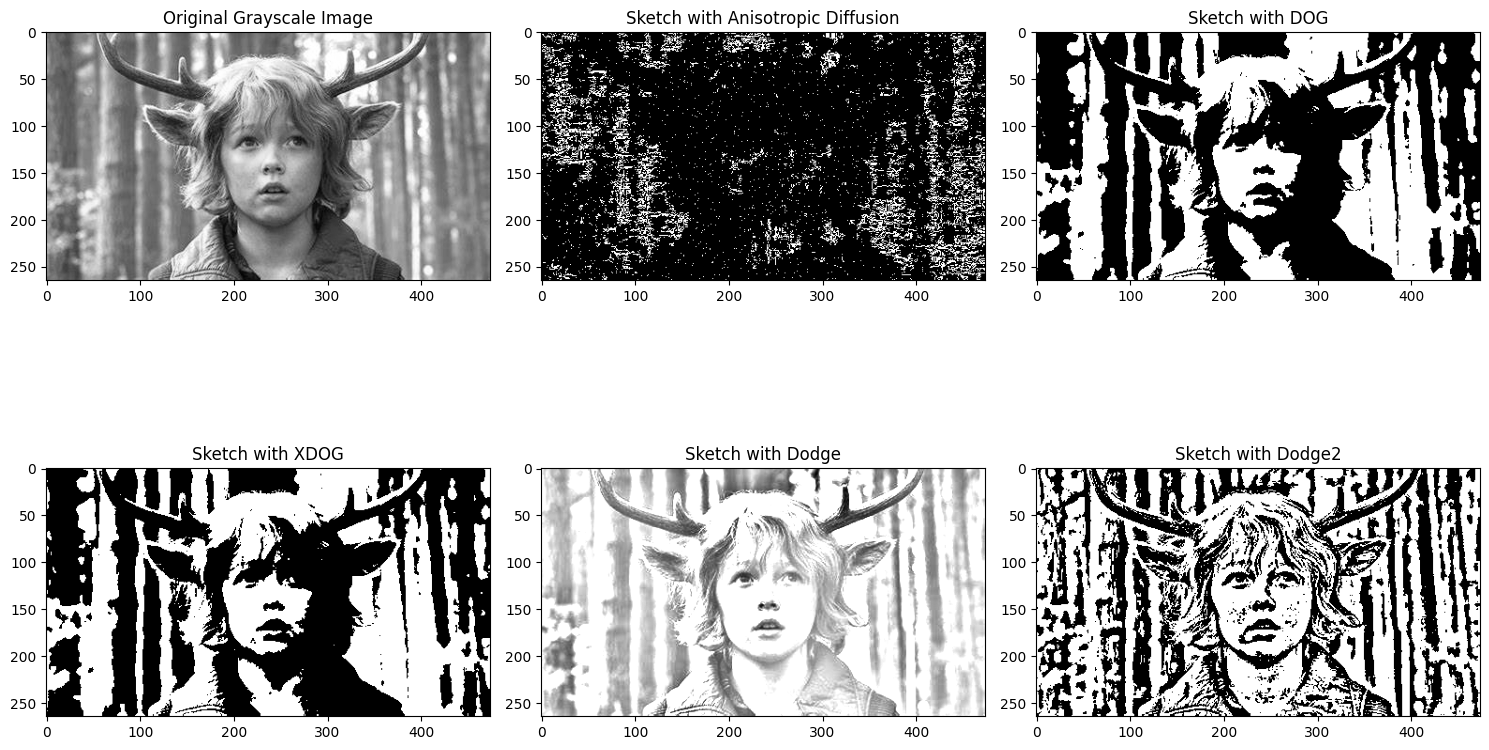

In [ ]:
# Membaca gambar dan konversi ke grayscale
img = imread('/content/drive/MyDrive/images/sweet.jpeg') # Ganti dengan path gambar Anda
img_gray = rgb2gray(img)

# Menghasilkan sketch dengan berbagai metode
edges_anisotropic = edges_with_anisotropic_diffusion(img_gray)  # Pastikan menggunakan fungsi yang diperbaiki
sketch_anisotropic = sketch(img_gray, edges_anisotropic)

edges_dog = edges_with_DOG(img_gray)
sketch_dog = sketch(img_gray, edges_dog)

sketch_xdog = sketch_with_XDOG(img_gray)

sketch_dodge = sketch_with_dodge(img_gray)

edges_dodge2 = edges_with_dodge2(img_gray)
sketch_dodge2 = sketch(img_gray, edges_dodge2)

# Menampilkan gambar
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(2, 3, 2)
plt.imshow(sketch_anisotropic, cmap='gray')
plt.title('Sketch with Anisotropic Diffusion')

plt.subplot(2, 3, 3)
plt.imshow(sketch_dog, cmap='gray')
plt.title('Sketch with DOG')

plt.subplot(2, 3, 4)
plt.imshow(sketch_xdog, cmap='gray')
plt.title('Sketch with XDOG')

plt.subplot(2, 3, 5)
plt.imshow(sketch_dodge, cmap='gray')
plt.title('Sketch with Dodge')

plt.subplot(2, 3, 6)
plt.imshow(sketch_dodge2, cmap='gray')
plt.title('Sketch with Dodge2')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import matplotlib.pylab as plt
src = cv2.imread('/content/drive/MyDrive/images/sweet.jpeg')
#dst = cv2.detailEnhance(src, sigma_s=10, sigma_r=0.15)
dst_sketch, dst_color_sketch = cv2.pencilSketch(src, sigma_s=50,
sigma_r=0.05, shade_factor=0.05)
dst_water_color = cv2.stylization(src, sigma_s=50, sigma_r=0.05)


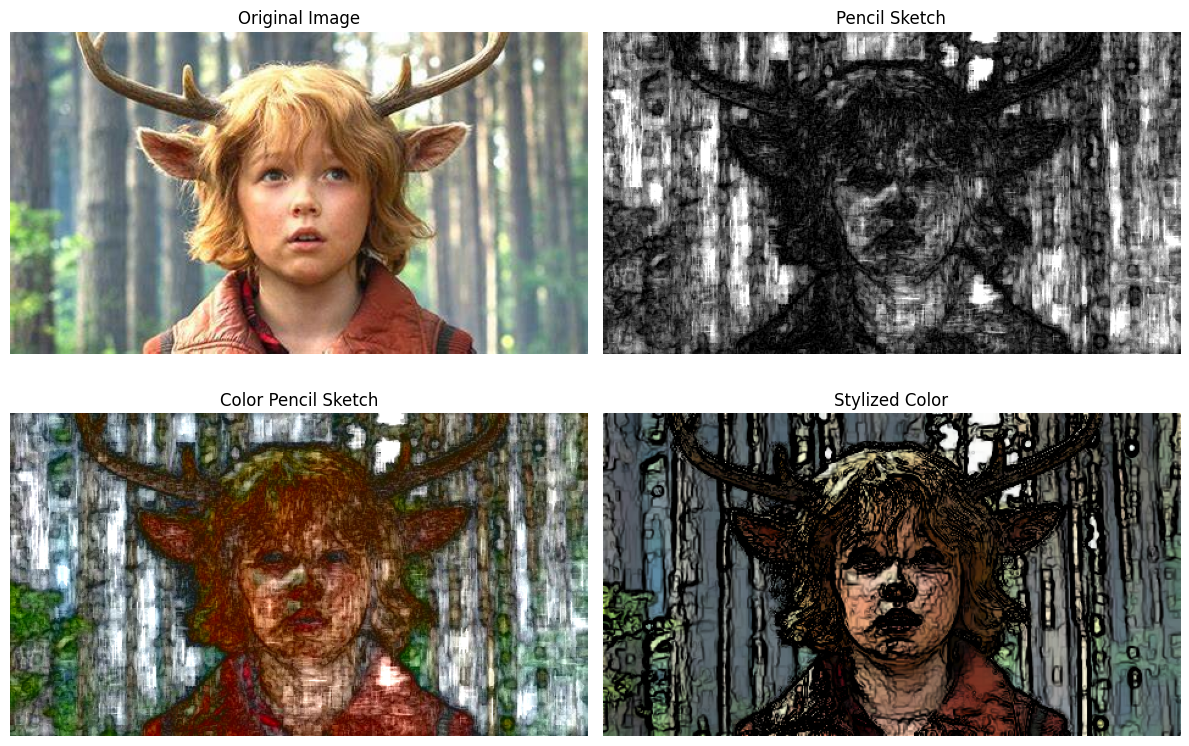

In [ ]:
# Display the images using matplotlib.pyplot
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dst_sketch, cmap='gray')
plt.title('Pencil Sketch')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(dst_color_sketch, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Color Pencil Sketch')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(dst_water_color, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Stylized Color')
plt.axis('off')

plt.tight_layout()
plt.show()